In [1]:
import numpy as np
from numpy import *
from numpy.random import *
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
from matplotlib.colors import ListedColormap
from matplotlib import colors
import matplotlib.ticker as mticker
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.cm as cm
from scipy.stats import norm
import seaborn as sns
colors = sns.hls_palette(8, l=.3, s=.8)

In [2]:
AJC_data=loadtxt("AJC.txt")

#Audience
Aud_mean=np.mean(AJC_data[:,3])
Aud_std=np.std(AJC_data[:,3])

Aud_2TM=[AJC_data[0,3],AJC_data[1,3],AJC_data[2,3],AJC_data[3,3],AJC_data[5,3],AJC_data[6,3],AJC_data[8,3],AJC_data[10,3],AJC_data[12,3],AJC_data[14,3]]
Aud_1TM=[AJC_data[4,3],AJC_data[7,3],AJC_data[9,3],AJC_data[11,3],AJC_data[13,3]]

Aud_mean_1TM=np.mean(Aud_1TM)
Aud_std_1TM=np.std(Aud_1TM)
Aud_mean_2TM=np.mean(Aud_2TM)
Aud_std_2TM=np.std(Aud_2TM)

#Duration (cumulative)
t_mean_total=np.mean(AJC_data[:,6])
t_std_total=np.std(AJC_data[:,6])

#Duration (Academics vs PhD)
Acad_meetings=[AJC_data[0,0],AJC_data[1,0],AJC_data[2,0],AJC_data[3,0],AJC_data[5,0],AJC_data[6,0],AJC_data[7,0],AJC_data[8,0],AJC_data[10,0],AJC_data[14,0]]
Acad_time=[AJC_data[0,4],AJC_data[1,4],AJC_data[2,4],AJC_data[3,4],AJC_data[5,4],AJC_data[6,4],AJC_data[7,4],AJC_data[8,4],AJC_data[10,4],AJC_data[14,4]]

PhD_meetings=[AJC_data[0,0],AJC_data[1,0],AJC_data[2,0],AJC_data[3,0],AJC_data[4,0],AJC_data[5,0],AJC_data[6,0],AJC_data[8,0],AJC_data[9,0],AJC_data[10,0],AJC_data[11,0],AJC_data[12,0],AJC_data[12,0],AJC_data[13,0],AJC_data[14,0]]
PhD_time=[AJC_data[0,5],AJC_data[1,5],AJC_data[2,5],AJC_data[3,5],AJC_data[4,5],AJC_data[5,5],AJC_data[6,5],AJC_data[8,5],AJC_data[9,5],AJC_data[10,5],AJC_data[11,5],AJC_data[12,4],AJC_data[12,5],AJC_data[13,5],AJC_data[14,5]]

two_speaker_time=[AJC_data[0,6],AJC_data[1,6],AJC_data[2,6],AJC_data[3,6],AJC_data[5,6],AJC_data[6,6],AJC_data[8,6],AJC_data[10,6],AJC_data[12,6],AJC_data[14,6]]
one_speaker_time=[AJC_data[4,6],AJC_data[7,6],AJC_data[9,6],AJC_data[11,6],AJC_data[13,6]]

t_mean_Acad=np.mean(Acad_time)
t_std_Acad=np.std(Acad_time)

t_mean_PhD=np.mean(PhD_time)
t_std_PhD=np.std(PhD_time)

t_mean_oneS=np.mean(one_speaker_time)
t_std_oneS=np.std(one_speaker_time)

t_mean_twoS=np.mean(two_speaker_time)
t_std_twoS=np.std(two_speaker_time)


In [3]:
print("AUDIENCE [# of people]\n")

print("- mean audeince (cumulative):",Aud_mean,"±",Aud_std,"\n")
print("- mean audeince (2 Talk Meetings):",Aud_mean_2TM,"±",Aud_std_2TM,"\n")
print("- mean audeince (1 Talk Meetings):",Aud_mean_1TM,"±",Aud_std_1TM,"\n")

AUDIENCE [# of people]

- mean audeince (cumulative): 15.4 ± 3.0066592756745814 

- mean audeince (2 Talk Meetings): 15.8 ± 2.481934729198171 

- mean audeince (1 Talk Meetings): 14.6 ± 3.720215047547655 



In [4]:
print("MEETING TIME [minutes]\n")

print("- Total mean time:",t_mean_total,"±",t_std_total,"\n")

print("- 2 talk meetings mean time:",t_mean_twoS,"±",t_std_twoS,"\n")
print("- 1 talk meetings mean time:",t_mean_oneS,"±",t_std_oneS,"\n")

print("- Students mean time:",t_mean_PhD,"±",t_std_PhD,"\n")
print("- Academics mean time:",t_mean_Acad,"±",t_std_Acad,"\n")

MEETING TIME [minutes]

- Total mean time: 56.0 ± 17.489044189625307 

- 2 talk meetings mean time: 67.5 ± 7.22841614740048 

- 1 talk meetings mean time: 33.0 ± 4.427188724235731 

- Students mean time: 31.533333333333335 ± 3.2427697352040825 

- Academics mean time: 36.7 ± 4.539823785126467 



In [5]:
#Gender of Speakers

female_PhD=5 #E.Maggio, V.Capalbo, G. Navarro, M. Moroni, S.Fatigoni
male_PhD=10 #A.D'Ambrosio, A.Incatasciato, L.Mele, L.Mugnai, R.Arjona, A.Bocchieri, A.Thakur, D.Sciotti, M.Mastrofini, M.Romano

female_Acad=3 #R.Valiante, E.DiValentino, A.Milillo
male_Acad=7 #A.Papitto, F.Renzi, L.Stella, L.Graziani, L.Lamagna, GL.Israel, L.DiMascolo


In [6]:
#Topics

#Gravitation and Cosmology
Cosmology_PhD_th=4 #E.Maggio,V.Capalbo,R.Arjona,D.Sciotti
Cosmology_PhD_exp=3 #L.Mele, A.Incatasciato, S.Fatigoni
Cosmology_Acad_th=2 #F.Renzi, E.DiValentino
Cosmology_Acad_exp=1 #L.Laamagna

Cosmology_PhD=Cosmology_PhD_th+Cosmology_PhD_exp
Cosmology_Acad=Cosmology_Acad_th+Cosmology_Acad_exp
Cosmology_th=Cosmology_PhD_th+Cosmology_Acad_th
Cosmology_exp=Cosmology_PhD_exp+Cosmology_Acad_exp

Cosmology=Cosmology_PhD+Cosmology_Acad

#(extra)Galactic and high energy astrophysics
Galactic_PhD_th=3 #G.Navarro, A.Thakur, M.Romano
Galactic_PhD_exp=0
Galactic_Acad_th=5 #R.Valiante,A.Papitto,L.Graziani,GL.Israel, L.DiMascolo 
Galactic_Acad_exp=0

Galactic_PhD=Galactic_PhD_th+Galactic_PhD_exp
Galactic_Acad=Galactic_Acad_th+Galactic_Acad_exp
Galactic_th=Galactic_PhD_th+Galactic_Acad_th
Galactic_exp=Galactic_PhD_exp+Galactic_Acad_exp

Galactic=Galactic_PhD+Galactic_Acad

#Panets and Esoplanets
Planets_PhD_th=2 #L.Mugnai,A.Bocchieri
Planets_PhD_exp=1 #M.Moroni
Planets_Acad_th=0
Planets_Acad_exp=1 #A.Milillo

Planets_PhD=Planets_PhD_th+Planets_PhD_exp
Planets_Acad=Planets_Acad_th+Planets_Acad_exp
Planets_th=Planets_PhD_th+Planets_Acad_th
Planets_exp=Planets_PhD_exp+Planets_Acad_exp

Planets=Planets_PhD+Planets_Acad

#Stellar Astro
Stellar_PhD_th=0
Stellar_PhD_exp=0
Stellar_Acad_th=1 #L.Stella
Stellar_Acad_exp=0

Stellar_PhD=Stellar_PhD_th+Stellar_PhD_exp
Stellar_Acad=Stellar_Acad_th+Stellar_Acad_exp
Stellar_th=Stellar_PhD_th+Stellar_Acad_th
Stellar_exp=Stellar_PhD_exp+Stellar_Acad_exp

Stellar=Stellar_PhD+Stellar_Acad

#Space sience
SpaceS_PhD=2 #A.D'Ambrosio,M.Mastrofini
SpaceS_Acad=0

SpaceS=SpaceS_PhD+SpaceS_Acad


<ipython-input-7-67552e5ee401>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = plt.subplot(111)


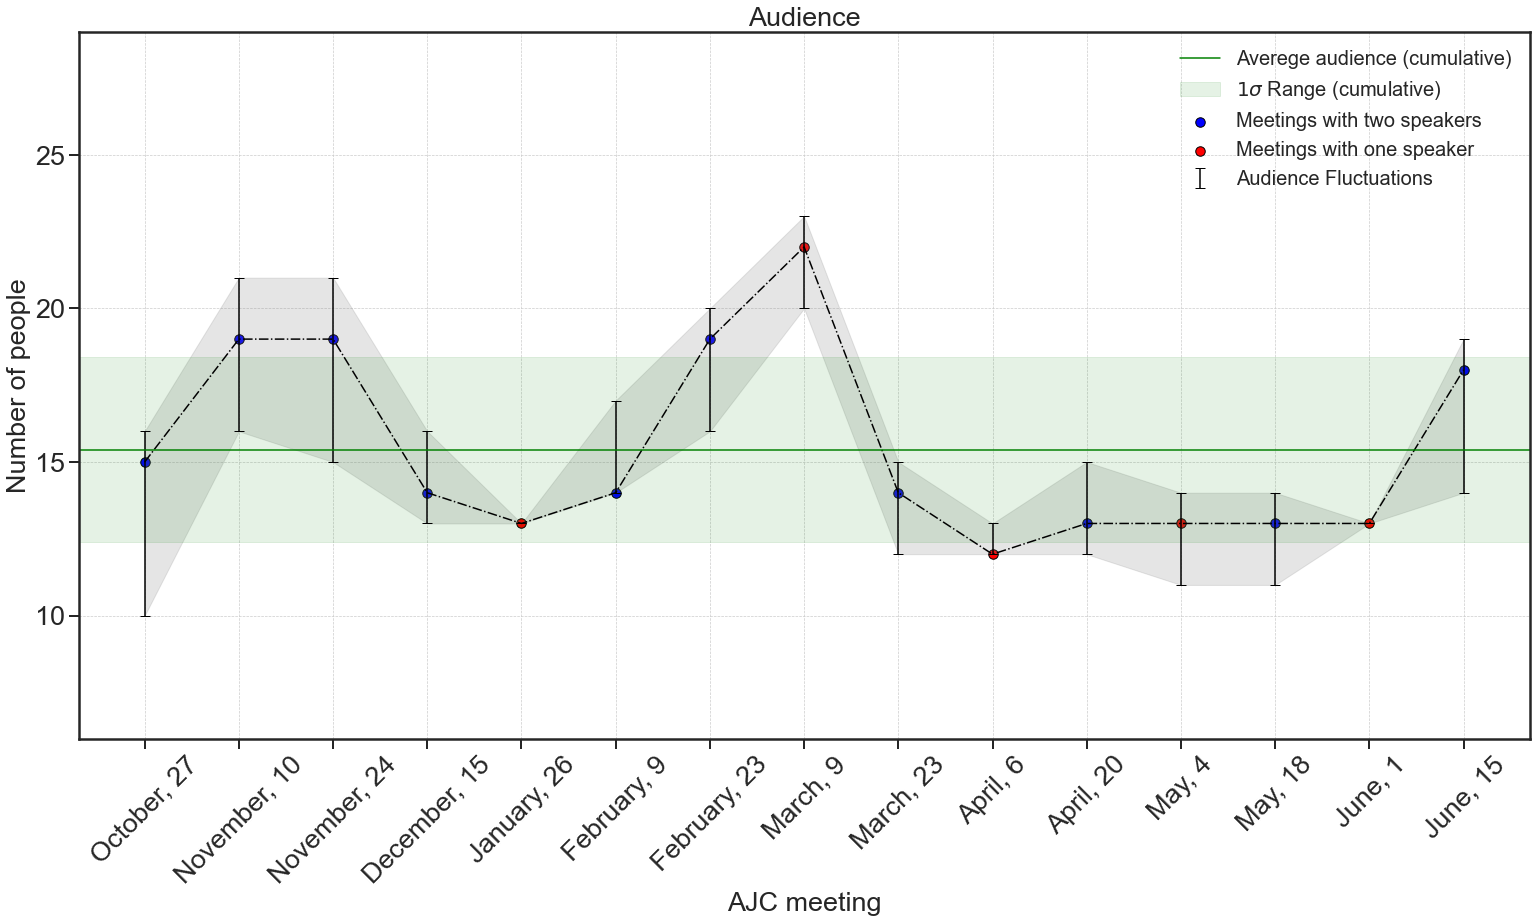

In [7]:
plt.rcParams["axes.edgecolor"] = "0.15"
plt.rcParams["axes.linewidth"]  = "2.5"
plt.rcParams["ytick.labelsize"]  = "27"
plt.rcParams["xtick.labelsize"]  = "27"
plt.rcParams["axes.titlesize"]  = "27"
plt.rcParams["figure.figsize"] = [26, 13]
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1

plt.xticks(rotation=45)
plt.xticks(np.arange(min(AJC_data[:,0]), max(AJC_data[:,0])+1, 1.0))

ax1 = plt.subplot(111)

ax1.set_title('Audience')
ax1.set_xlabel(r'AJC meeting',fontsize = 27)
ax1.set_ylabel(r'Number of people',fontsize = 27)

ax1.grid(linestyle='--',linewidth=0.7)
ax1.set_ylim(6,29)

asymmetric_error = [AJC_data[:,3]-AJC_data[:,1], AJC_data[:,2]-AJC_data[:,3]]

ax1.errorbar(AJC_data[:,0],AJC_data[:,3],yerr=asymmetric_error, alpha=1,color="k", marker='None',capsize=5, capthick=1,linestyle="none",label="Audience Fluctuations")

ax1.plot(AJC_data[:,0],AJC_data[:,3],color="k",linestyle="-.")

ax1.scatter(AJC_data[0,0],AJC_data[0,3],s=90, alpha=1,color="b",edgecolors= "k",label="Meetings with two speakers")
ax1.scatter(AJC_data[1,0],AJC_data[1,3],s=90, alpha=1,color="b",edgecolors= "k")
ax1.scatter(AJC_data[2,0],AJC_data[2,3],s=90, alpha=1,color="b",edgecolors= "k")
ax1.scatter(AJC_data[3,0],AJC_data[3,3],s=90, alpha=1,color="b",edgecolors= "k")
ax1.scatter(AJC_data[4,0],AJC_data[4,3],s=90, alpha=1,color="r",edgecolors= "k",label="Meetings with one speaker")
ax1.scatter(AJC_data[5,0],AJC_data[5,3],s=90, alpha=1,color="b",edgecolors= "k")
ax1.scatter(AJC_data[6,0],AJC_data[6,3],s=90, alpha=1,color="b",edgecolors= "k")
ax1.scatter(AJC_data[7,0],AJC_data[7,3],s=90, alpha=1,color="r",edgecolors= "k")
ax1.scatter(AJC_data[8,0],AJC_data[8,3],s=90, alpha=1,color="b",edgecolors= "k")
ax1.scatter(AJC_data[9,0],AJC_data[9,3],s=90, alpha=1,color="r",edgecolors= "k")
ax1.scatter(AJC_data[10,0],AJC_data[10,3],s=90, alpha=1,color="b",edgecolors= "k")
ax1.scatter(AJC_data[11,0],AJC_data[11,3],s=90, alpha=1,color="r",edgecolors= "k")
ax1.scatter(AJC_data[12,0],AJC_data[12,3],s=90, alpha=1,color="b",edgecolors= "k")
ax1.scatter(AJC_data[13,0],AJC_data[13,3],s=90, alpha=1,color="r",edgecolors= "k")
ax1.scatter(AJC_data[14,0],AJC_data[14,3],s=90, alpha=1,color="b",edgecolors= "k")

plt.fill_between(AJC_data[:,0],AJC_data[:,1],AJC_data[:,2],color="gray",alpha=0.2)

plt.axhline(Aud_mean,color='green',label="Averege audience (cumulative)")
#plt.axhline(Aud_mean_1TM,color="r",linestyle="--", linewidth="0.8", label="Average audience (1 talk meetings)")
#plt.axhline(Aud_mean_2TM,color="b",linestyle="--", linewidth="0.8",label="Average audience (2 talk meetings)")
plt.axhspan(Aud_mean-Aud_std,Aud_mean+Aud_std,color="green",alpha=0.1,label="$1\sigma$ Range (cumulative)")

#ax1.scatter(AJC_data[:,0],AJC_data[:,3],s=80, alpha=1,color="k")

labels = [item.get_text() for item in ax1.get_xticklabels()]
labels[0]='October, 27'
labels[1]='November, 10'
labels[2]='November, 24'
labels[3]='December, 15'
labels[4]='January, 26'
labels[5]='February, 9'
labels[6]='February, 23'
labels[7]='March, 9'
labels[8]='March, 23'
labels[9]='April, 6'
labels[10]='April, 20'
labels[11]='May, 4'
labels[12]='May, 18'
labels[13]='June, 1'
labels[14]='June, 15'
ax1.set_xticklabels(labels)

plt.legend(fontsize="20")

plt.show()

#plt.savefig("Plot/Audiance.pdf")

<ipython-input-8-dab17cb7c2f7>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = plt.subplot(111)


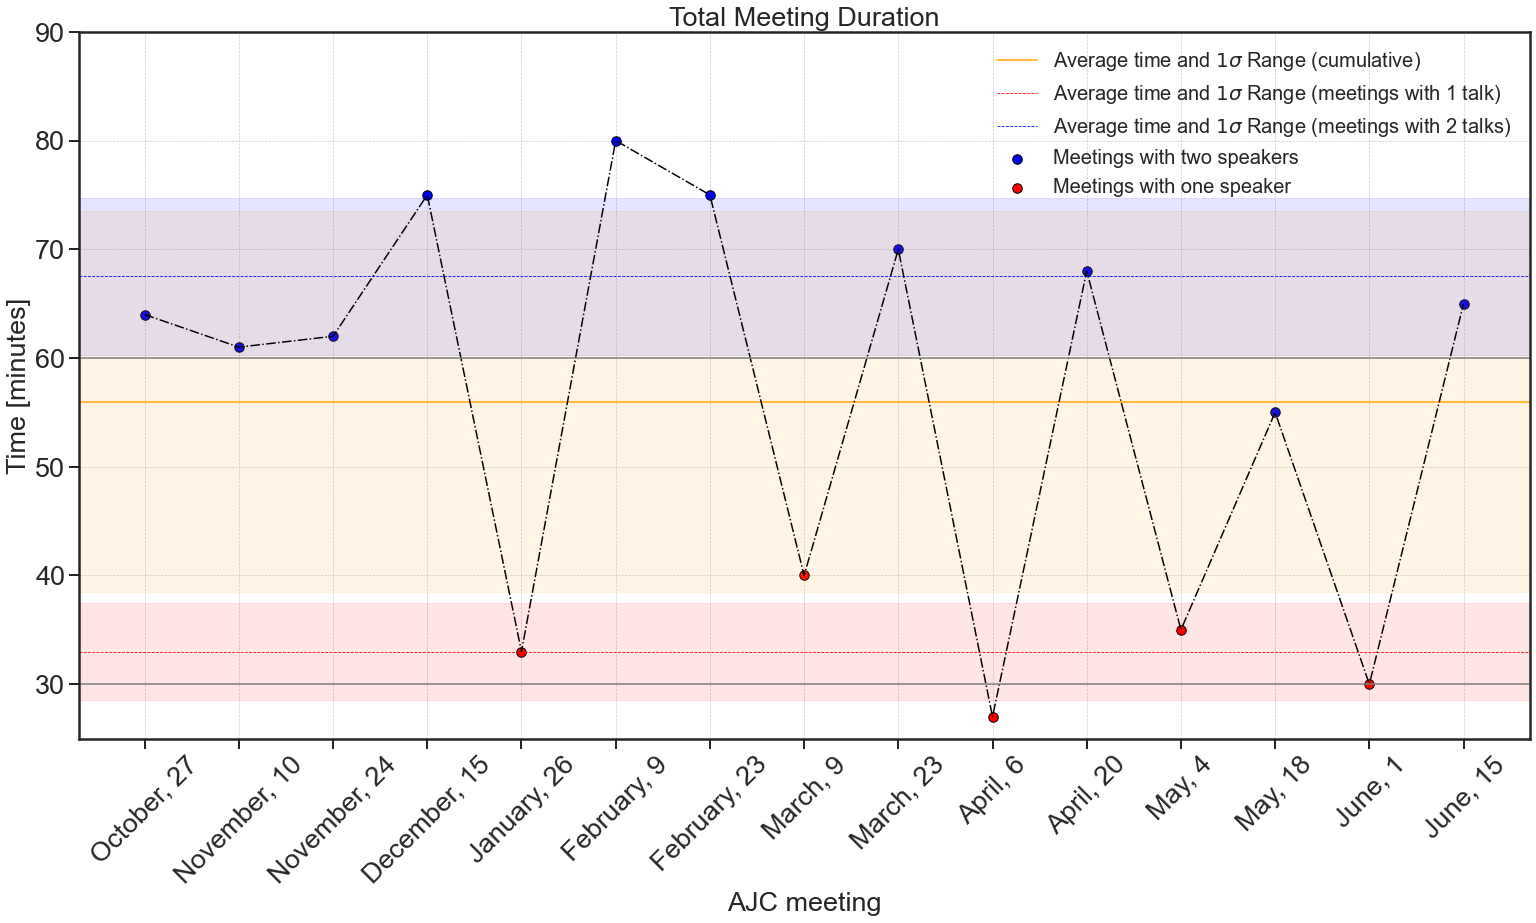

In [8]:
plt.rcParams["axes.edgecolor"] = "0.15"
plt.rcParams["axes.linewidth"]  = "2.5"
plt.rcParams["ytick.labelsize"]  = "27"
plt.rcParams["xtick.labelsize"]  = "27"
plt.rcParams["axes.titlesize"]  = "27"
plt.rcParams["figure.figsize"] = [26, 13]
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1

plt.xticks(np.arange(min(AJC_data[:,0]), max(AJC_data[:,0])+1, 1.0))
plt.xticks(rotation=45)

ax1 = plt.subplot(111)

ax1.set_xlabel(r'AJC meeting',fontsize = 27)
ax1.set_ylabel(r'Time [minutes]',fontsize = 27)
ax1.set_title('Total Meeting Duration')
ax1.grid(linestyle='--',linewidth=0.7)

ax1.set_ylim(25,90)

plt.axhline(t_mean_total,color="orange",label="Average time and $1\sigma$ Range (cumulative)")
plt.axhspan(t_mean_total-t_std_total,t_mean_total+t_std_total,color="orange",alpha=0.1) # $1\sigma$ Range(cumulative)

plt.axhline(t_mean_oneS,color="r",linestyle="--", linewidth="0.8", label="Average time and $1\sigma$ Range (meetings with 1 talk)")
plt.axhspan(t_mean_oneS-t_std_oneS,t_mean_oneS+t_std_oneS,color="r",alpha=0.1) #$1\sigma$ Range (meetings with 1 talk)


plt.axhline(t_mean_twoS,color="b",linestyle="--", linewidth="0.8",label="Average time and $1\sigma$ Range (meetings with 2 talks)")
plt.axhspan(t_mean_twoS-t_std_twoS,t_mean_twoS+t_std_twoS,color="b",alpha=0.1) #$1\sigma$ Range (meetings with 2 talks)



ax1.scatter(AJC_data[0,0],AJC_data[0,6],s=90, alpha=1,color="b",edgecolors= "k",label="Meetings with two speakers")
ax1.scatter(AJC_data[1,0],AJC_data[1,6],s=90, alpha=1,color="b",edgecolors= "k")
ax1.scatter(AJC_data[2,0],AJC_data[2,6],s=90, alpha=1,color="b",edgecolors= "k")
ax1.scatter(AJC_data[3,0],AJC_data[3,6],s=90, alpha=1,color="b",edgecolors= "k")
ax1.scatter(AJC_data[4,0],AJC_data[4,6],s=90, alpha=1,color="r",edgecolors= "k",label="Meetings with one speaker")
ax1.scatter(AJC_data[5,0],AJC_data[5,6],s=90, alpha=1,color="b",edgecolors= "k")
ax1.scatter(AJC_data[6,0],AJC_data[6,6],s=90, alpha=1,color="b",edgecolors= "k")
ax1.scatter(AJC_data[7,0],AJC_data[7,6],s=90, alpha=1,color="r",edgecolors= "k")
ax1.scatter(AJC_data[8,0],AJC_data[8,6],s=90, alpha=1,color="b",edgecolors= "k")
ax1.scatter(AJC_data[9,0],AJC_data[9,6],s=90, alpha=1,color="r",edgecolors= "k")
ax1.scatter(AJC_data[10,0],AJC_data[10,6],s=90, alpha=1,color="b",edgecolors= "k")
ax1.scatter(AJC_data[11,0],AJC_data[11,6],s=90, alpha=1,color="r",edgecolors= "k")
ax1.scatter(AJC_data[12,0],AJC_data[12,6],s=90, alpha=1,color="b",edgecolors= "k")
ax1.scatter(AJC_data[13,0],AJC_data[13,6],s=90, alpha=1,color="r",edgecolors= "k")
ax1.scatter(AJC_data[14,0],AJC_data[14,6],s=90, alpha=1,color="b",edgecolors= "k")

ax1.plot(AJC_data[:,0],AJC_data[:,6],color="k",linestyle="-.")

plt.axhline(60,color="grey")
plt.axhline(30,color="grey")

labels = [item.get_text() for item in ax1.get_xticklabels()]
labels[0]='October, 27'
labels[1]='November, 10'
labels[2]='November, 24'
labels[3]='December, 15'
labels[4]='January, 26'
labels[5]='February, 9'
labels[6]='February, 23'
labels[7]='March, 9'
labels[8]='March, 23'
labels[9]='April, 6'
labels[10]='April, 20'
labels[11]='May, 4'
labels[12]='May, 18'
labels[13]='June, 1'
labels[14]='June, 15'

ax1.set_xticklabels(labels)

plt.legend(fontsize="20")

plt.show()

#plt.savefig("Plot/Duration.pdf")

<ipython-input-9-ed7eb31e5067>:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = plt.subplot(111)


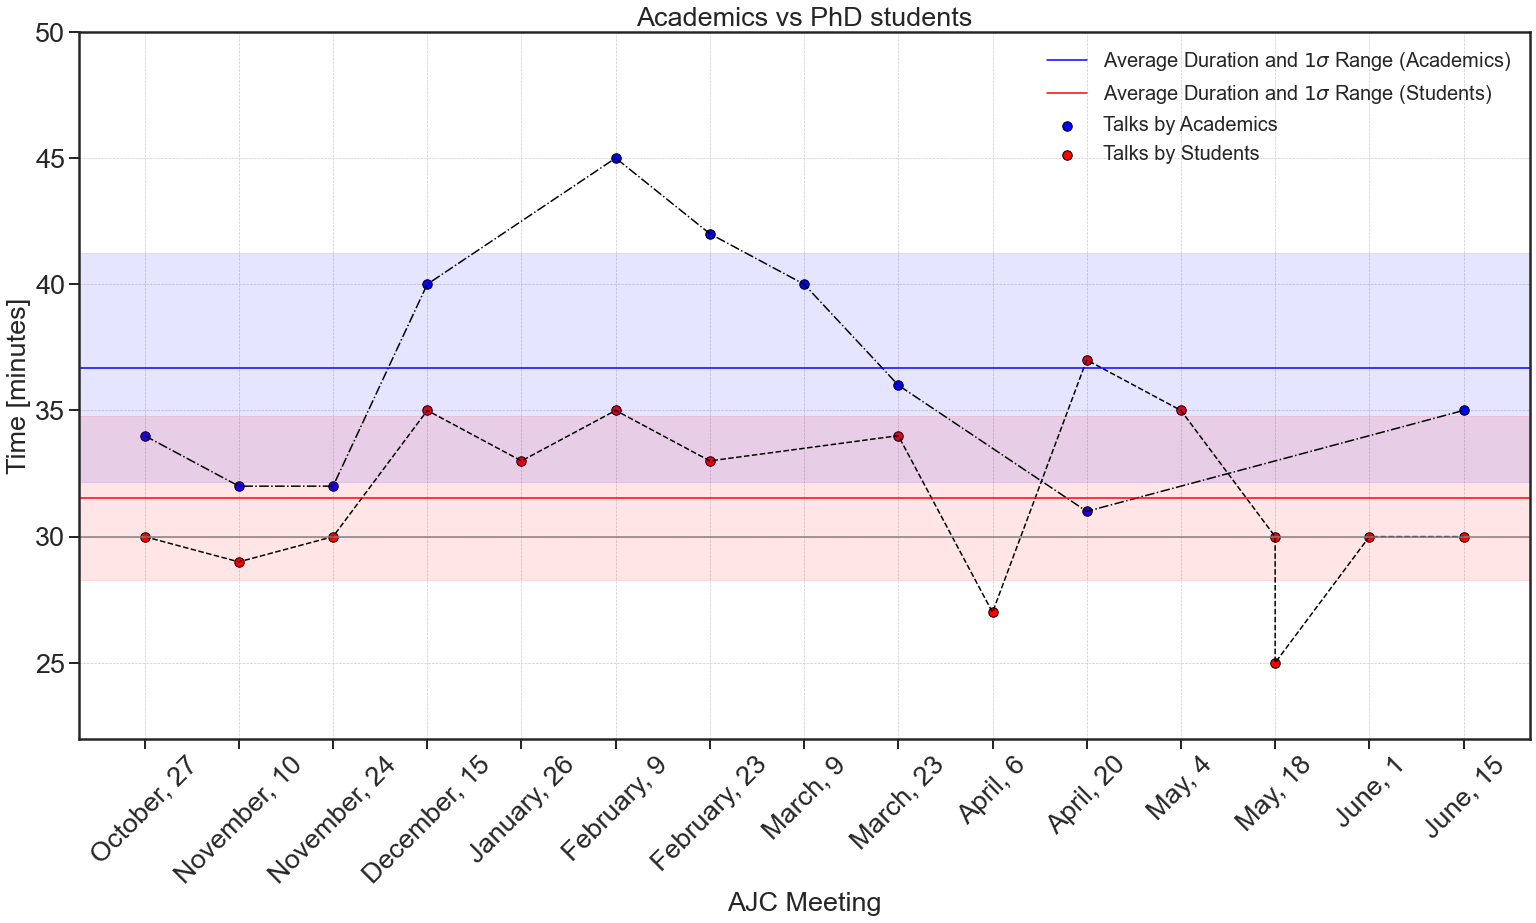

In [9]:
plt.rcParams["axes.edgecolor"] = "0.15"
plt.rcParams["axes.linewidth"]  = "2.5"
plt.rcParams["ytick.labelsize"]  = "27"
plt.rcParams["xtick.labelsize"]  = "27"
plt.rcParams["axes.titlesize"]  = "27"
plt.rcParams["figure.figsize"] = [26,13]
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1

plt.xticks(np.arange(min(AJC_data[:,0]), max(AJC_data[:,0])+1, 1.0))
plt.xticks(rotation=45)


ax1 = plt.subplot(111)

ax1.set_xlabel(r'AJC Meeting',fontsize = 27)
ax1.set_ylabel(r'Time [minutes]',fontsize = 27)
ax1.grid(linestyle='--',linewidth=0.7)

ax1.set_title('Academics vs PhD students')

ax1.set_ylim(22,50)

ax1.scatter(Acad_meetings,Acad_time,s=90, alpha=1,color="b",edgecolors= "k",label="Talks by Academics")
ax1.plot(Acad_meetings,Acad_time,color="k",linestyle="-.")

ax1.scatter(PhD_meetings,PhD_time,s=90, alpha=1,color="r",edgecolors= "k",label="Talks by Students")
ax1.plot(PhD_meetings,PhD_time,color="k",linestyle="--")

plt.axhline(t_mean_Acad,color="b",label="Average Duration and $1\sigma$ Range (Academics)")
plt.axhspan(t_mean_Acad-t_std_Acad,t_mean_Acad+t_std_Acad,color="blue",alpha=0.1) #label="$1\sigma$ Range (Academics)")

plt.axhline(t_mean_PhD,color="r",label="Average Duration and $1\sigma$ Range (Students)")
plt.axhspan(t_mean_PhD-t_std_PhD,t_mean_PhD+t_std_PhD,color="r",alpha=0.1) #label="$1\sigma$ Range (Students)")

labels = [item.get_text() for item in ax1.get_xticklabels()]
labels[0]='October, 27'
labels[1]='November, 10'
labels[2]='November, 24'
labels[3]='December, 15'
labels[4]='January, 26'
labels[5]='February, 9'
labels[6]='February, 23'
labels[7]='March, 9'
labels[8]='March, 23'
labels[9]='April, 6'
labels[10]='April, 20'
labels[11]='May, 4'
labels[12]='May, 18'
labels[13]='June, 1'
labels[14]='June, 15'
ax1.set_xticklabels(labels)

plt.axhline(30,color="grey")

plt.legend(fontsize="20")

plt.show()

#plt.savefig("Plot/Academics_vs_png.pdf")

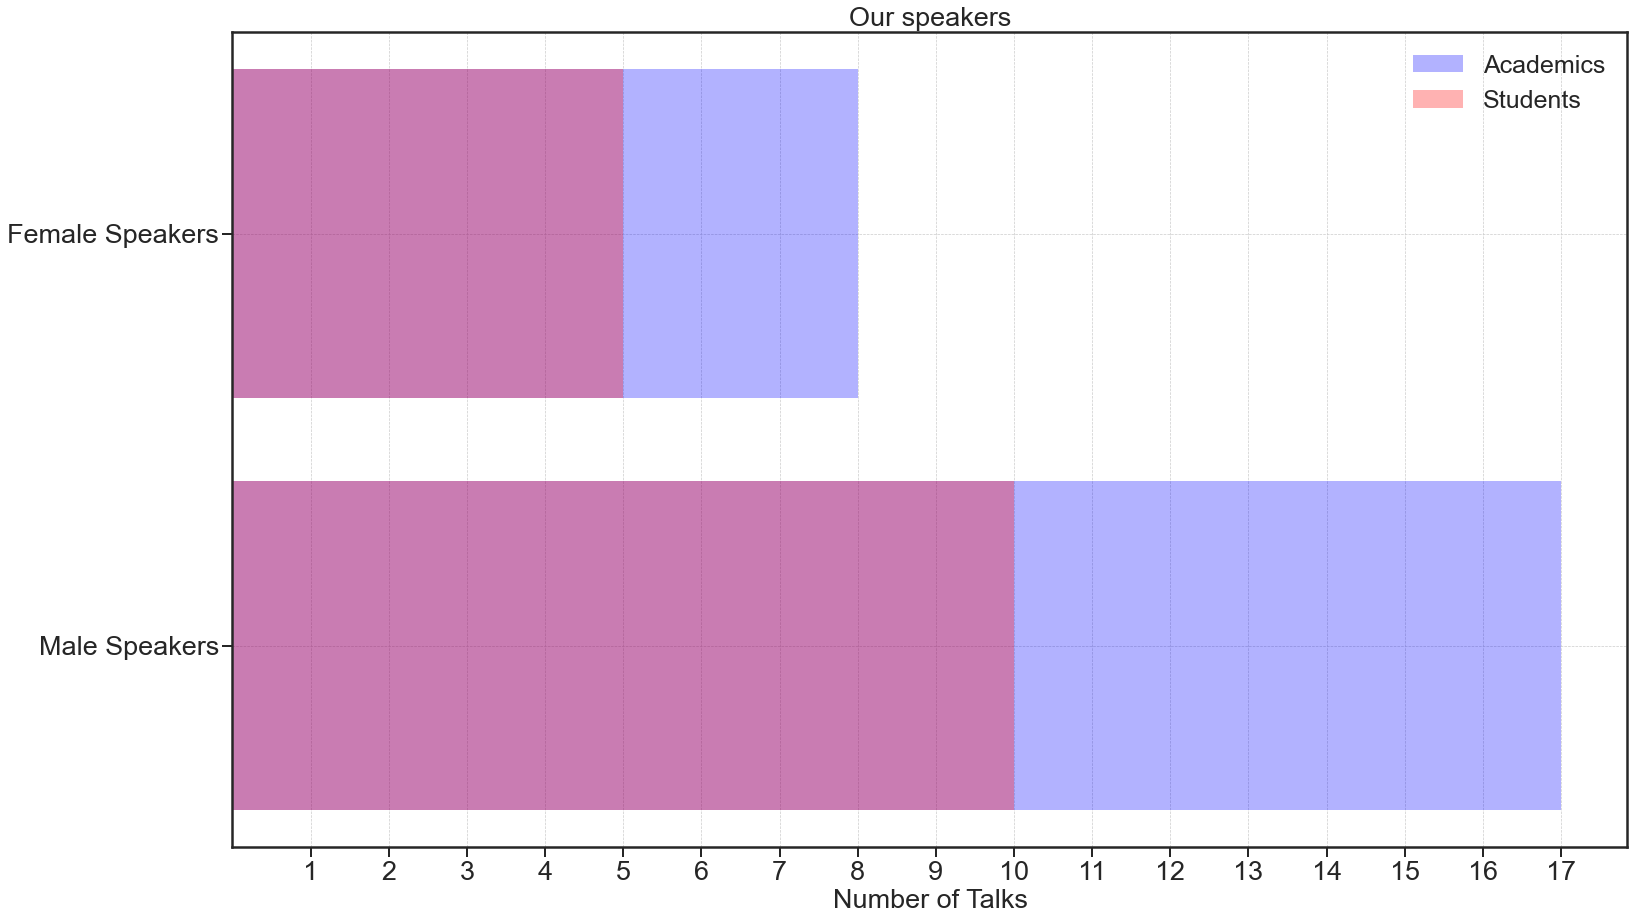

In [10]:
plt.rcParams["axes.edgecolor"] = "0.15"
plt.rcParams["axes.linewidth"]  = "2.5"
plt.rcParams["ytick.labelsize"]  = "27"
plt.rcParams["xtick.labelsize"]  = "27"
plt.rcParams["axes.titlesize"]  = "27"
plt.rcParams["figure.figsize"] = [25, 15]
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1

ax1 = plt.subplot(111)
plt.xticks(np.arange(min(AJC_data[:,0]), max(AJC_data[:,0])+3, 1.0))
ax1.set_xlabel(r'Number of Talks',fontsize = 27)

ax1.set_title('Our speakers')
ax1.grid(linestyle='--',linewidth=0.7)

gender= ("Male Speakers","Female Speakers")


gender_speaker_total=[male_Acad+male_PhD,female_Acad+female_PhD]
gender_speaker_PhD=[male_PhD,female_PhD]

ax1.barh(gender, gender_speaker_total,label="Academics",color="blue",alpha=0.3)
ax1.barh(gender, gender_speaker_PhD,label="Students",color="red",alpha=0.3)
plt.legend(fontsize="25")
plt.show()
#plt.savefig("Plot/Gender.pdf")

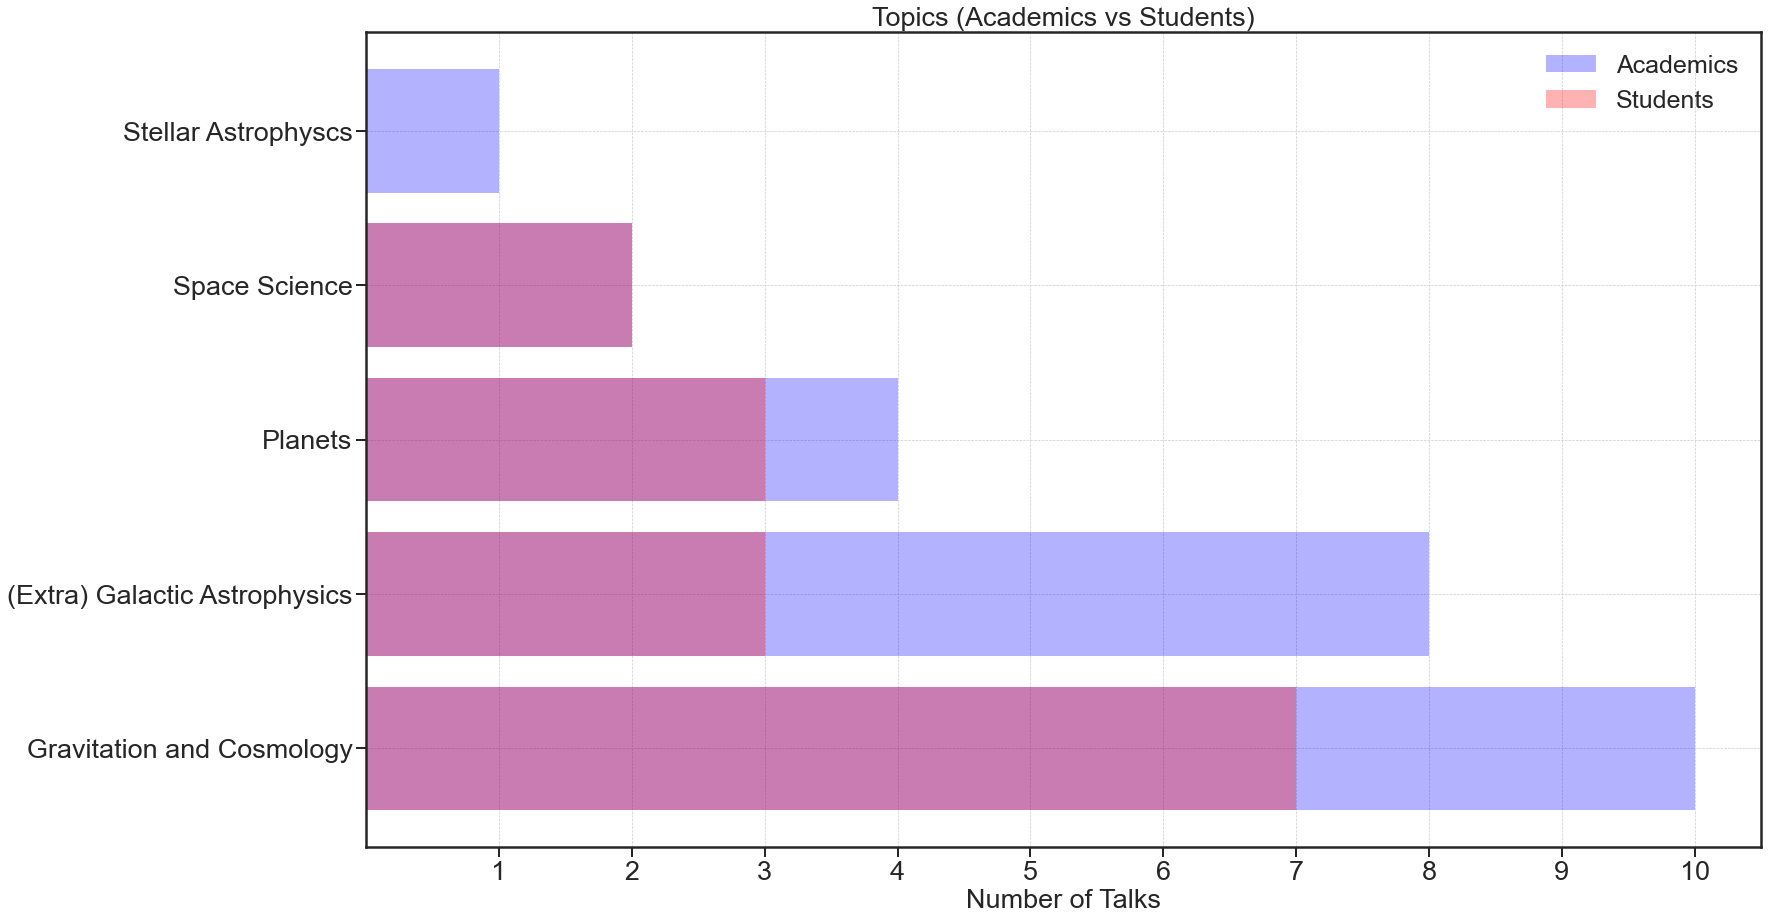

In [11]:
plt.rcParams["axes.edgecolor"] = "0.15"
plt.rcParams["axes.linewidth"]  = "2.5"
plt.rcParams["ytick.labelsize"]  = "27"
plt.rcParams["xtick.labelsize"]  = "27"
plt.rcParams["axes.titlesize"]  = "27"
plt.rcParams["figure.figsize"] = [25, 15]
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1

ax1 = plt.subplot(111)

plt.xticks(np.arange(min(AJC_data[:,0]), max(AJC_data[:,0])+2, 1.0))

ax1.set_title('Topics (Academics vs Students)')
ax1.grid(linestyle='--',linewidth=0.7)
ax1.set_xlabel(r'Number of Talks',fontsize = 27)
topics=("Gravitation and Cosmology", "(Extra) Galactic Astrophysics","Planets","Space Science","Stellar Astrophyscs",)
Total_topic_talks=[Cosmology,Galactic,Planets,SpaceS,Stellar]
PhD_topic_talks=[Cosmology_PhD,Galactic_PhD,Planets_PhD,SpaceS_PhD,Stellar_PhD]

ax1.barh(topics,Total_topic_talks,label="Academics",color="blue",alpha=0.3)
ax1.barh(topics,PhD_topic_talks,label="Students",color="red",alpha=0.3)

ax1.legend(fontsize="25")

plt.show()


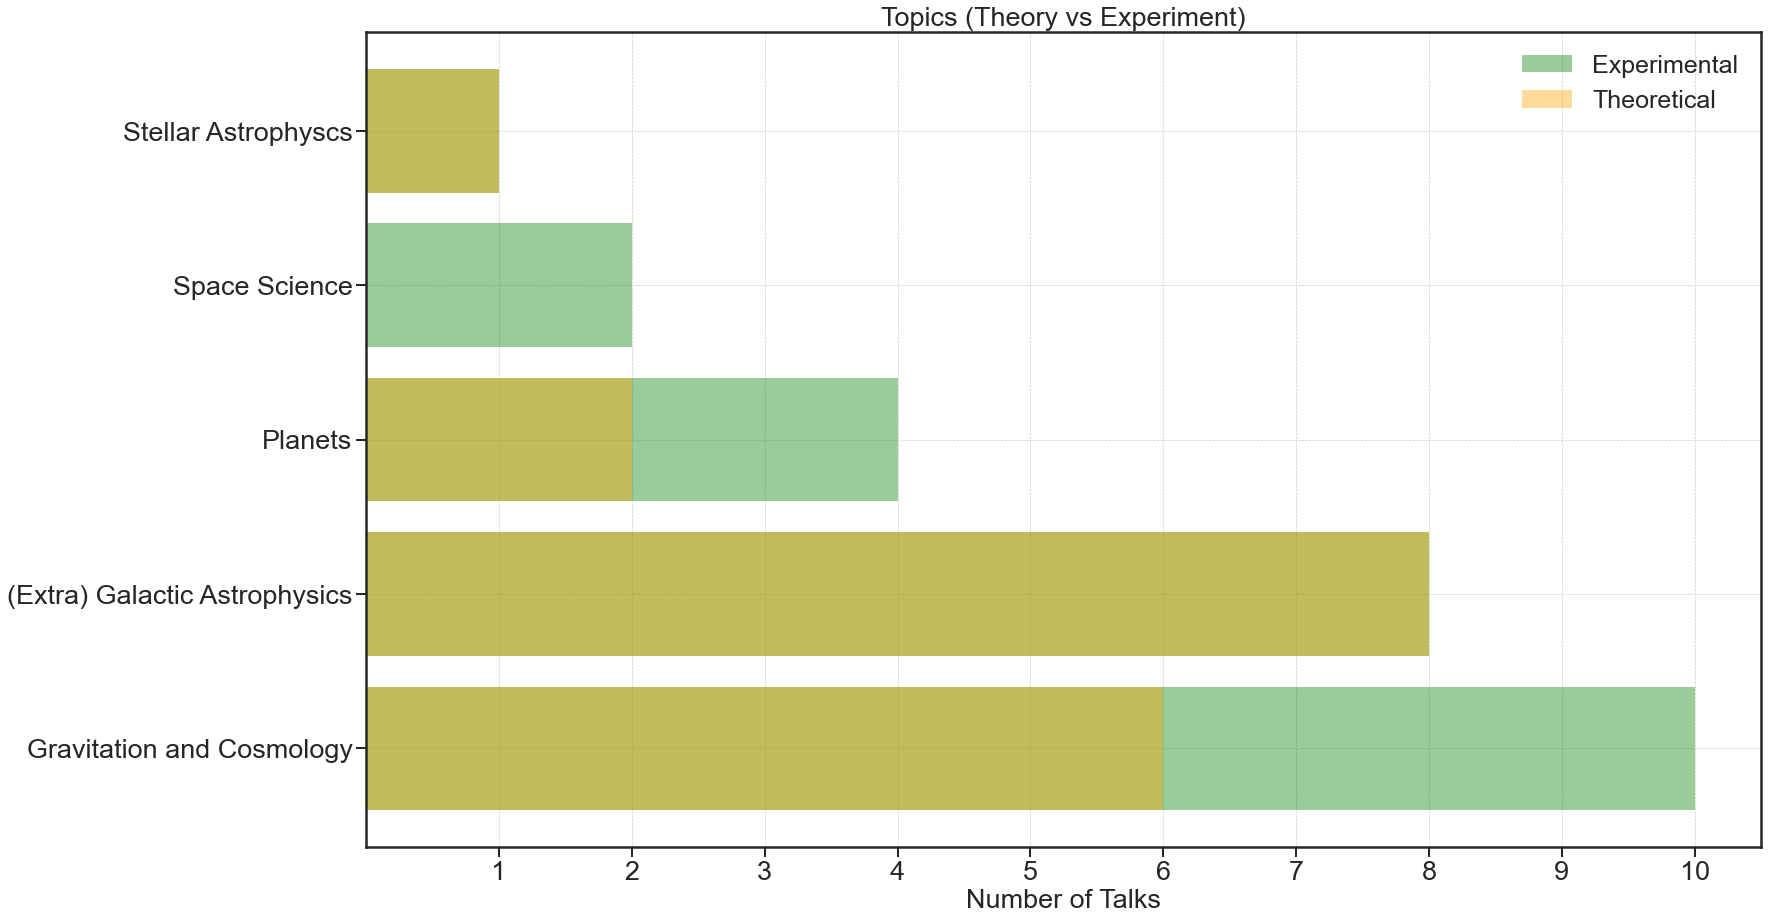

In [12]:
plt.rcParams["axes.edgecolor"] = "0.15"
plt.rcParams["axes.linewidth"]  = "2.5"
plt.rcParams["ytick.labelsize"]  = "27"
plt.rcParams["xtick.labelsize"]  = "27"
plt.rcParams["axes.titlesize"]  = "27"
plt.rcParams["figure.figsize"] = [25, 15]
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1

ax1 = plt.subplot(111)

plt.xticks(np.arange(min(AJC_data[:,0]), max(AJC_data[:,0])+2, 1.0))

ax1.set_xlabel(r'Number of Talks',fontsize = 27)
ax1.set_title('Topics (Theory vs Experiment)')
ax1.grid(linestyle='--',linewidth=0.7)

topics=("Gravitation and Cosmology", "(Extra) Galactic Astrophysics","Planets","Space Science","Stellar Astrophyscs")
Total_topic_talks=[Cosmology,Galactic,Planets,SpaceS,Stellar]
Th_topic_talks=[Cosmology_th,Galactic_th,Planets_th,0,Stellar_th]

ax1.barh(topics,Total_topic_talks,label="Experimental",color="green",alpha=0.4)
ax1.barh(topics,Th_topic_talks,label="Theoretical",color="orange",alpha=0.4)

ax1.legend(fontsize="25")

plt.show()

